In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def linear_slope(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return (y2 - y1) / (x2 - x1)

def estimate_y_der(f: callable, epsilon: float, x, y):
    near_x_x = x + epsilon
    return linear_slope((x, y), (near_x_x, f(near_x_x)))

def gradient_decent(f, a, b, epsilon):
    dx = 0
    dx_prev = 0
    dx_weight = 0
    xs = []
    ys = []
    x = a
    l = 0.01
    y = f(x)
    xs.append(x)
    ys.append(y)
    while x < b:
        dx = estimate_y_der(f, epsilon, x, y)
        print(f"{x}, {dx}")
        dx_abs = abs(dx)
        x += l * dx_abs
        if dx_abs < 1:
            x += dx_weight
            dx_weight += 0.001 * dx_abs
        
        y = f(x)
        xs.append(x)
        ys.append(y)
#         if (dx_prev > 0) != (dx_prev < 0):
#             l /= 2
        dx_prev = dx
    return xs, ys

In [21]:
from mpl_toolkits.axisartist.axislines import SubplotZero

def draw_x():
    fig = plt.figure()
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)
    ax.axis["xzero"].set_axisline_style("-|>")
    ax.axis["xzero"].set_visible(True)

def plot_traverse(f, f_traverse, a, b, epsilon):
    draw_x()
    x = np.linspace(a, b, 200)
    y = f(x)
    x_sample, y_sample = f_traverse(f, a, b, epsilon)
    print(f"sampled points amount: {len(x_sample)}")
    plt.plot(x, y, 'g')
    plt.plot(x_sample, y_sample, 'o')
    plt.show()

-100, 190.4371838039854
-98.09562816196015, 195.90666903422505
-96.1365614716179, -182.07031457289742
-94.31585832588893, -11.582015354492826
-94.200038172344, 40.86575297449799
-93.79138064259901, -175.32181737162
-92.0381624688828, -51.106091134811926
-91.52710155753468, 27.973625550753223
-91.24736530202715, -118.92093681369121
-90.05815593389023, -78.33220911760998
-89.27483384271413, 174.06135250206708
-87.53422031769345, 174.10713878482298
-85.79314892984522, 164.5548607325954
-84.14760032251927, -159.14416015867474
-82.55615872093252, 27.283226157020792
-82.28332645936231, 150.69285713025295
-80.77639788805979, 156.05774967502128
-79.21582039130958, 29.174795708349222
-78.92407243422609, 113.41956325553164
-77.78987680167077, -132.02981599608077
-76.46957864170996, 70.39930450347121
-75.76558559667525, 112.5011859576684
-74.64057373709856, 58.05002990467881
-74.06007343805177, -140.30125617548902
-72.65706087629688, -56.32444878587982
-72.09381638843809, -35.219201502725234
-71.

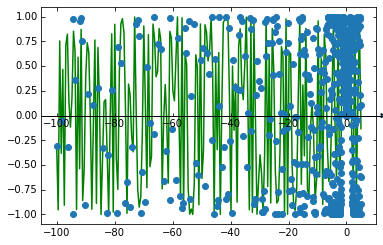

In [23]:
def func3(x):
    return np.sin(x ** 2)
plot_traverse(func3, gradient_decent, -100, 5, 1e-6)